In [1]:
import random
from math import exp 
from math import log
from math import sqrt
import matplotlib
from matplotlib import pylab
from matplotlib import pyplot as plt 

matplotlib.style.use('ggplot')
%matplotlib inline 



In [3]:
L=4
N=L*L

links=[]
for i in range (N):
    links.append([])
    links[i].append((i // L) * L + (i + 1) % L)
    links[i].append((i + L) % N)
    links[i].append((i // L) * L + (i - 1) % L) 
    links[i].append((i - L) % N)


#print links 

In [4]:
numberofconfigurations=2**N 
Tc = 2/log(1+sqrt(2))

#print numberofconfigurations 

65536


In [5]:
Spin=[]
for i in range(N):
    Spin.append(random.choice([1, -1]))
    
#print Spin
 



In [6]:
Ms=[]
energies=[]
Cs=[]
numberofsteps= 10000
Ts= [0.5 + 0.01 * i for i in range(500)]
M=sum(Spin)
for T in Ts: 
    Mtemp=0
    k=0
    for i in range(numberofsteps): 
        chooseposition = random.randint(0, N - 1)
        Ei=0

        for f in links[chooseposition]:
            Ei=Ei+Spin[f]
    
        delta=2.0 *Spin[chooseposition]*Ei 
        randomvalue=random.uniform(0.0, 1.0) 
        Edelt=exp(-delta/T)
        if( randomvalue< Edelt):
            Spin[chooseposition]=Spin[chooseposition]*(-1)
            M += 2 * Spin[chooseposition]
            
        if i % N == 0 and i > numberofsteps / 2:
            Mtemp =Mtemp + abs(M)
            k=k + 1
    #X.append(j)
    #y.append(sum(Spin))
    #energies.append(energy(Spin, N, links))
    Ms.append(abs(Mtemp)/ float(k * N))
    
    #print T 


The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


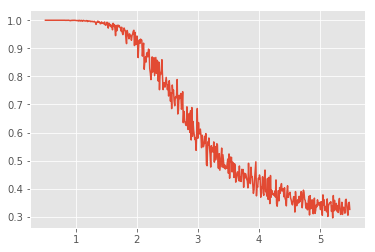

In [6]:
#pylab.plot(Ts, Ms , '-')

In [9]:
s1=[]
mapofenergy={}
for i in range (N):
    s1.append(-1)
    
#print s1

numbers=[]
for i in range (N+1):
    numbers.append(i+1)

#print numbers

#mapofenergy[s1]=-2 * N 


In [10]:
E=-2*N
mapofenergy[E]=1
for i in range(numberofconfigurations-1):
    
    h=0
    p = numbers[0]
    if (p<=N):
        #p = numbers[0]
        numbers[p - 1] = numbers[p]
        numbers[p] = p + 1
        if p != 1: 
            numbers[0] = 1
    
    for j in links[p- 1]:
        h=h+s1[j];
    
    E = E+2*h*s1[p - 1] 
    s1[p - 1] = (-1)*s1[p - 1]
    if E in mapofenergy: 
        mapofenergy[E] =mapofenergy[E]+1
    else:        
        mapofenergy[E] = 1
        
        
#print mapofenergy


    
    

In [11]:
Ms=[]
energies=[]
Cs=[]
numberofsteps= 10000
Ts= [0.5 + 0.01 * i for i in range(500)]
M=sum(Spin)
for T in Ts: 
    Mtemp=0
    k=0
    Z=0
    averageE=0
    sqrE=0
    for i in range(numberofsteps): 
        chooseposition = random.randint(0, N - 1)
        Ei=0

        for f in links[chooseposition]:
            Ei=Ei+Spin[f]
    
        delta=2.0 *Spin[chooseposition]*Ei 
        randomvalue=random.uniform(0.0, 1.0) 
        Edelt=exp(-delta/T)
        if( randomvalue< Edelt):
            Spin[chooseposition]=Spin[chooseposition]*(-1)
            M += 2 * Spin[chooseposition]
            
        if i % N == 0 and i > numberofsteps / 2:
            Mtemp =Mtemp + abs(M)
            k=k + 1 
    #X.append(j)
    #y.append(sum(Spin))
    #energies.append(energy(Spin, N, links))
    Ms.append(abs(Mtemp)/ float(k * N))
    for j in mapofenergy.keys(): 
        Z=Z+exp(-j/T)*mapofenergy[j]
        averageE=averageE+exp(-j/T)*j*mapofenergy[j]
        #sqrE=sqrE+exp(-j/T)*j*exp(-j/T)*j*mapofenergy[j]*mapofenergy[j]
        sqrE=sqrE+exp(-j/T)*j*mapofenergy[j]*exp(-j/T)*j*mapofenergy[j]
    averageE=averageE/Z
    sqrE=sqrE/Z
    temp=(sqrE-averageE*averageE)/N/T/T
    Cs.append(temp)
    #print ((sqrE-averageE*averageE)/N/T/T)
    energies.append(averageE)
    
 

In [12]:
Ms=[]
energies=[]
Cs=[]
numberofsteps= 10000
Ts= [0.5 + 0.01 * i for i in range(500)]
#Ts=[0.5 + 0.5 * i for i in range(10)]
for T in Ts: 
    Z=0.0
    averageE=0.0
    sqrE=0.0
    for j in mapofenergy.keys(): 
        #print j
        #print T
        #print -j/T
        #print exp(-j/T)
        Z=Z+exp((1.0)*(-j/T))*mapofenergy[j]
        #print exp(-j/T)*mapofenergy[j] 
        #print Z
        averageE=averageE+(1.0)*exp((1.0)*(-j/T))*j*mapofenergy[j]
        
        sqrE=sqrE+(1.0)*exp((1.0)*(-j/T))*mapofenergy[j]*j*j
    averageE=averageE/Z
    sqrE=sqrE/Z
    temp=float((sqrE-averageE*averageE)/N/T/T)
    Cs.append(temp)
    #print ((sqrE-averageE*averageE)/N/T/T)
    energies.append(averageE)
    
    #print T
    
    
    

In [13]:
#pylab.plot(Ts, energies , '-')

In [14]:
#pylab.plot(Ts, Cs , '-')

In [15]:
steps=10000
Mhs=[] 
print Spin 
T1=Tc-0.2
b=0.5
for i  in range(steps):
    position = random.randint(0,N-1)
    rand = random.uniform(0.0,1.0)
    h = sum(Spin[j] for j in links[position ])
    Spin[position ] = -1
    if rand< (1.0/(1.0+exp(-2.0*b*h))):
        Spin[position ] = 1
        
        
#print Spin 
        





[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1]
